## Superfund cleanups and near-port community composition for Seattle 

Ashli Blow 
The new working notebook is named "Seattle", and Seattle Draft V1, Seattle Draft V2, and Seattle Draft V3 are reference notebooks. 

### Import Data & Packages

In [1]:
import os
import requests

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona
import xyzservices.providers as xyz


In [2]:
#%matplotlib widget

In [3]:
!pip install -q censusdata

In [4]:
datadir = '/home/jovyan/superfund-gentrification/Data'
fixed_fn = '/home/jovyan/superfund-gentrification/Data/fixed_effects.csv'
socio_stand_fn = '/home/jovyan/superfund-gentrification/Data/socio_stand.csv'
socio_nom_fn = '/home/jovyan/superfund-gentrification/Data/socio_nominal.csv'

In [5]:
print("Fixed Effects Data:", fixed_fn)
print("Socioeconomic Data - Standard:", socio_stand_fn)
print("Socioeconomic Data - Nomnial:", socio_nom_fn)

Fixed Effects Data: /home/jovyan/superfund-gentrification/Data/fixed_effects.csv
Socioeconomic Data - Standard: /home/jovyan/superfund-gentrification/Data/socio_stand.csv
Socioeconomic Data - Nomnial: /home/jovyan/superfund-gentrification/Data/socio_nominal.csv


### Fixed Effects DataFrame

In [6]:
fixed_df = pd.read_csv(fixed_fn)
aea_proj_str = '+proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 +lon_0=-114.27'
fixed_gdf = gpd.GeoDataFrame(fixed_df, crs='EPSG:4326', geometry=gpd.points_from_xy(fixed_df['lon'], fixed_df['lat']))
fixed_gdf_aea = fixed_gdf.to_crs(aea_proj_str)
fixed_gdf_aea.head()


,site,sitescore,state,county,city,street,zip,lat,lon,state_fips,...,tracts,tract_fips,status_epa,states_plaintalk,status_binary,cercla1990,cercla2000,cercla2010,cercla2020,geometry
0,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,Mobile,Saraland,Craig Dr,36571.0,30.808331,-88.073061,1.0,...,5400.0,1.097005e+09,Deleted NPL Site,Completed,1,0,0,1,1,POINT (2500797.782 -855198.329)
1,Stauffer Chemical Co. (LeMoyne Plant),32.34,Alabama,Mobile,Axis,US 43,36560.0,30.969439,-88.017500,1.0,...,5702.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2500633.447 -836762.935)
2,Triana/Tennessee River,61.42,Alabama,"Limestone, Madison, Morgan","Limestone, Morgan",Signal Point Dr,35754.0,34.508888,-86.638194,1.0,...,5704.0,1.103006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2504565.873 -426248.662)
3,Stauffer Chemical Co. (Cold Creek Plant),46.77,Alabama,Mobile,Bucks,US 43,36560.0,30.975000,-88.021389,1.0,...,5800.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2500091.552 -836295.442)
4,T.H. Agriculture & Nutrition Co. (Montgomery P...,44.46,Alabama,Montgomery,Montgomery,Birmingham Hwy,36108.0,32.376100,-86.379100,1.0,...,6000.0,1.101006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2602153.612 -641411.339)


In [7]:
fixed_df = pd.read_csv(fixed_fn)
aea_proj_str = '+proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 +lon_0=-114.27'
fixed_gdf = gpd.GeoDataFrame(fixed_df, crs='EPSG:4326', geometry=gpd.points_from_xy(fixed_df['lon'], fixed_df['lat']))
fixed_gdf_aea = fixed_gdf.to_crs(aea_proj_str)
fixed_gdf_aea.head()


,site,sitescore,state,county,city,street,zip,lat,lon,state_fips,...,tracts,tract_fips,status_epa,states_plaintalk,status_binary,cercla1990,cercla2000,cercla2010,cercla2020,geometry
0,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,Mobile,Saraland,Craig Dr,36571.0,30.808331,-88.073061,1.0,...,5400.0,1.097005e+09,Deleted NPL Site,Completed,1,0,0,1,1,POINT (2500797.782 -855198.329)
1,Stauffer Chemical Co. (LeMoyne Plant),32.34,Alabama,Mobile,Axis,US 43,36560.0,30.969439,-88.017500,1.0,...,5702.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2500633.447 -836762.935)
2,Triana/Tennessee River,61.42,Alabama,"Limestone, Madison, Morgan","Limestone, Morgan",Signal Point Dr,35754.0,34.508888,-86.638194,1.0,...,5704.0,1.103006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2504565.873 -426248.662)
3,Stauffer Chemical Co. (Cold Creek Plant),46.77,Alabama,Mobile,Bucks,US 43,36560.0,30.975000,-88.021389,1.0,...,5800.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2500091.552 -836295.442)
4,T.H. Agriculture & Nutrition Co. (Montgomery P...,44.46,Alabama,Montgomery,Montgomery,Birmingham Hwy,36108.0,32.376100,-86.379100,1.0,...,6000.0,1.101006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2602153.612 -641411.339)


### States 

<Axes: >

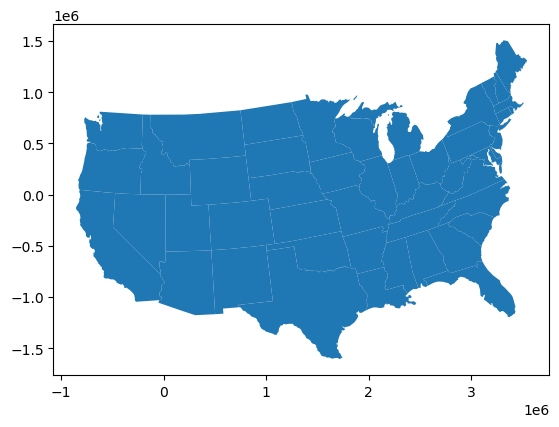

In [8]:
states_gdf = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

idx = states_gdf['name'].isin(['Alaska','Puerto Rico','Hawaii'])
states_gdf = states_gdf[~idx]

aea_proj_str = '+proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 +lon_0=-114.27'

aea_crs = fixed_gdf_aea.crs
aea_crs

states_gdf_aea = states_gdf.to_crs(aea_crs)
states_gdf_aea.plot()



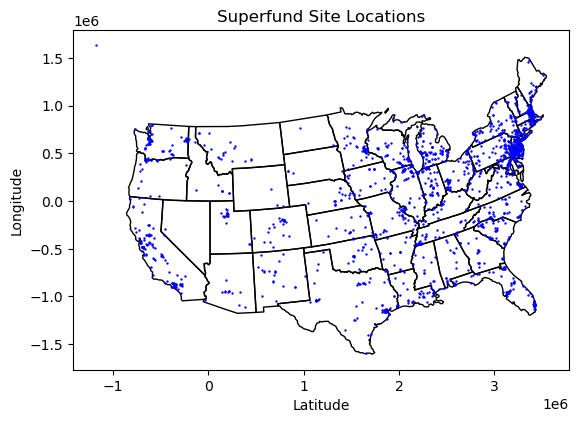

In [9]:
f, ax = plt.subplots()

states_gdf_aea.plot(ax=ax, facecolor='none', edgecolor='k')
fixed_gdf_aea.plot(ax=ax, marker='o', color='blue', markersize=.5, label='Sites')

plt.title('Superfund Site Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show()



### Washington 

<Axes: >

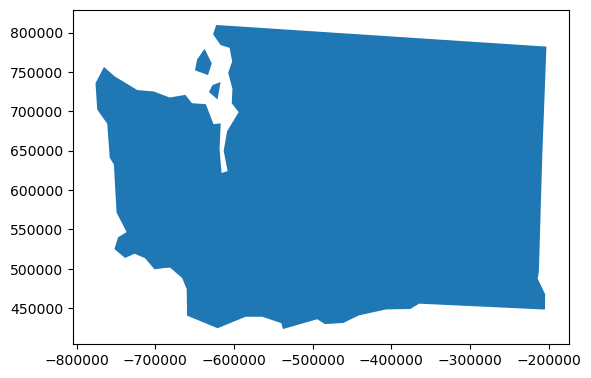

In [10]:
wa_gdf_aea = states_gdf_aea[states_gdf_aea['name'] == 'Washington']
wa_gdf_aea.plot()



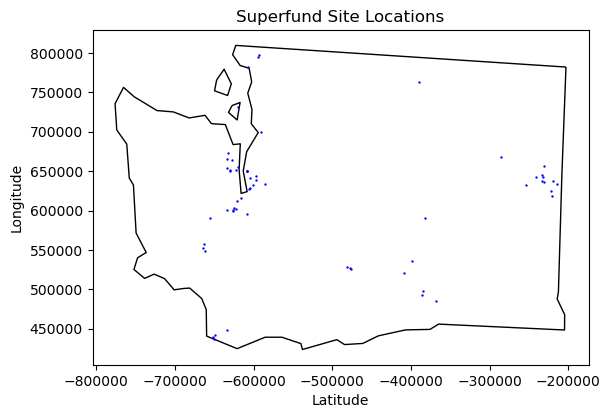

In [11]:
wa_gdf_clipped = gpd.clip(fixed_gdf_aea, wa_gdf_aea)

f, ax = plt.subplots()

wa_gdf_aea.plot(ax=ax, facecolor='none', edgecolor='k')
wa_gdf_clipped.plot(ax=ax, marker='o', color='blue', markersize=.5, label='Sites')

plt.title('Superfund Site Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show() 

### Seattle 

In [12]:
sea_fn = '/home/jovyan/superfund-gentrification/Data/Seattle_Area_Polygon_-142470933516081067.geojson'
sea_gdf = gpd.read_file(sea_fn)

sea_gdf_aea = sea_gdf.to_crs(aea_crs)
 

In [13]:
import requests
import zipfile
import os

url = "https://www2.census.gov/geo/tiger/TIGER2020/TRACT/tl_2020_53_tract.zip"
zip_file_path = "/home/jovyan/superfund-gentrification/Data/tl_2020_53_tract.zip"

response = requests.get(url)
with open(zip_file_path, 'wb') as f:
    f.write(response.content)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("/home/jovyan/superfund-gentrification/Data/WaTracts")

for file in os.listdir("/home/jovyan/superfund-gentrification/Data/WaTracts"):
    if file.endswith(".shp"):
        shp_file_path = os.path.join("/home/jovyan/superfund-gentrification/Data/WaTracts", file)

tracts = gpd.read_file(shp_file_path)
tracts = tracts.rename(columns={'TRACTCE':'tract'}).set_index('tract')

<Axes: >

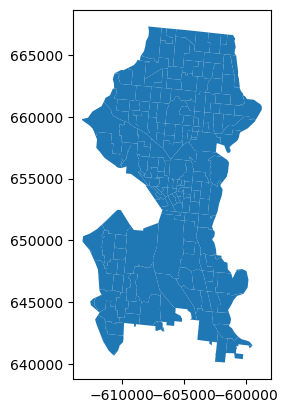

In [14]:
tracts = tracts.to_crs(sea_gdf_aea.crs)

sea_tracts = gpd.clip(tracts, sea_gdf_aea)
sea_tracts.plot()

In [15]:
sea_tracts_df = pd.DataFrame(sea_tracts)
sea_tracts_df.head()


,STATEFP,COUNTYFP,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
tract,,,,,,,,,,,,
026300,53,033,53033026300,263,Census Tract 263,G5020,S,4224982,323989,+47.5036921,-122.2847033,"MULTIPOLYGON (((-604442.107 643599.079, -60444..."
011700,53,033,53033011700,117,Census Tract 117,G5020,S,3515808,0,+47.5201682,-122.2828633,"POLYGON ((-604041.589 644181.413, -604036.416 ..."
011101,53,033,53033011101,111.01,Census Tract 111.01,G5020,S,1136851,0,+47.5394734,-122.2773089,"POLYGON ((-603045.355 645876.736, -602931.398 ..."
026101,53,033,53033026101,261.01,Census Tract 261.01,G5020,S,2706291,7108,+47.4871294,-122.2513766,"MULTIPOLYGON (((-602474.131 640189.645, -60247..."
025302,53,033,53033025302,253.02,Census Tract 253.02,G5020,S,4025029,2443067,+47.4920105,-122.2153547,"POLYGON ((-599701.770 641489.968, -599447.071 ..."


In [16]:
sea_tracts_gdf = gpd.GeoDataFrame(sea_tracts_df, geometry='geometry')
sea_tracts_gdf.head()



,STATEFP,COUNTYFP,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
tract,,,,,,,,,,,,
026300,53,033,53033026300,263,Census Tract 263,G5020,S,4224982,323989,+47.5036921,-122.2847033,"MULTIPOLYGON (((-604442.107 643599.079, -60444..."
011700,53,033,53033011700,117,Census Tract 117,G5020,S,3515808,0,+47.5201682,-122.2828633,"POLYGON ((-604041.589 644181.413, -604036.416 ..."
011101,53,033,53033011101,111.01,Census Tract 111.01,G5020,S,1136851,0,+47.5394734,-122.2773089,"POLYGON ((-603045.355 645876.736, -602931.398 ..."
026101,53,033,53033026101,261.01,Census Tract 261.01,G5020,S,2706291,7108,+47.4871294,-122.2513766,"MULTIPOLYGON (((-602474.131 640189.645, -60247..."
025302,53,033,53033025302,253.02,Census Tract 253.02,G5020,S,4025029,2443067,+47.4920105,-122.2153547,"POLYGON ((-599701.770 641489.968, -599447.071 ..."


In [17]:
fixed_gdf_aea_sea = gpd.clip(fixed_gdf_aea, sea_tracts)
fixed_gdf_aea_sea.head()


,site,sitescore,state,county,city,street,zip,lat,lon,state_fips,...,tracts,tract_fips,status_epa,states_plaintalk,status_binary,cercla1990,cercla2000,cercla2010,cercla2020,geometry
1625,Harbor Island (Lead),34.60,Washington,King,Seattle,13th Ave SW,98134.0,47.579400,-122.352200,53.0,...,9900.0,5.303301e+10,NPL Site,In Process,0,0,0,0,0,POINT (-607749.092 650039.819)
1623,Pacific Sound Resources,70.71,Washington,King,Seattle,SW Florida St,98106.0,47.582332,-122.366667,53.0,...,9900.0,5.303301e+10,NPL Site,In Process,0,0,0,0,0,POINT (-608803.104 650466.413)
1624,Lockheed West Seattle,50.00,Washington,King,Seattle,SW Florida St,98106.0,47.583889,-122.362500,53.0,...,9900.0,5.303301e+10,NPL Site,In Process,0,0,0,0,0,POINT (-608474.449 650609.071)


/tmp/ipykernel_551/2319990692.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


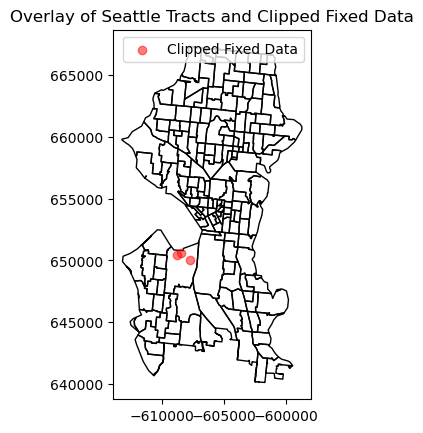

In [18]:
fixed_gdf_aea_sea = gpd.clip(fixed_gdf_aea, sea_tracts)
fig, ax = plt.subplots()

sea_tracts_gdf.plot(ax=ax, facecolor='none', edgecolor = 'k', label='Seattle Tracts')

fixed_gdf_aea_sea.plot(ax=ax, color='red', label='Clipped Fixed Data', alpha=0.5)

ax.set_title('Overlay of Seattle Tracts and Clipped Fixed Data')

ax.legend()
plt.show()


### Seattle with Socioeconomic Data

In [19]:
socio_stand = pd.read_csv(socio_stand_fn)
socio_stand_df = pd.DataFrame(socio_stand)
socio_stand_df.head()

socio_stand_gdf = gpd.GeoDataFrame(socio_stand_df)
socio_stand_gdf.head()

,state,statefip,county,countyfip,tract,18under1990,18under2000,18under2010,18under2020,18over1990,...,nhpi2010,nhpi2020,gqi1990,gqi2000,gqi2010,gqi2020,gqni1990,gqni2000,gqni2010,gqni2020
0,California,6,Colusa County,11,100,1222.48,1486.95,1600,1543.0,2577.91,...,10,9.0,0.0,5.0,0,0.0,71.14,0.0,0,0.0
1,California,6,Fresno County,19,100,19.00,28.00,16,96.0,2253.00,...,2,11.0,1816.0,2318.0,2344,2793.0,0.00,21.0,23,84.0
2,California,6,Humboldt County,23,100,913.00,927.00,814,852.0,2927.00,...,32,67.0,0.0,0.0,12,21.0,93.00,206.0,763,634.0
3,California,6,Inyo County,27,100,662.01,708.03,613,598.0,2050.07,...,3,0.0,0.0,0.0,0,0.0,0.00,2.0,8,0.0
4,California,6,Kings County,31,100,1063.10,1007.10,965,744.0,2481.29,...,1,4.0,0.0,0.0,0,0.0,0.00,10.0,8,0.0


In [20]:
socio_stand_gdf['statefip'] = socio_stand_gdf['statefip'].astype(str)
socio_stand_gdf['countyfip'] = socio_stand_gdf['countyfip'].astype(str)
socio_stand_gdf_king = socio_stand_gdf[(socio_stand_gdf['statefip'] == '53') & (socio_stand_gdf['countyfip'] == '33')]
socio_stand_gdf_king.head()



,state,statefip,county,countyfip,tract,18under1990,18under2000,18under2010,18under2020,18over1990,...,nhpi2010,nhpi2020,gqi1990,gqi2000,gqi2010,gqi2020,gqni1990,gqni2000,gqni2010,gqni2020
8891,Washington,53,King County,33,100,840.0,969.0,1039,1218.0,4051.0,...,47,30.0,0.0,0.0,4,5.0,14.0,33.0,43,79.0
8897,Washington,53,King County,33,200,1220.0,1182.0,1230,1440.0,5877.0,...,35,27.0,6.0,3.0,4,0.0,31.0,45.0,65,61.0
8905,Washington,53,King County,33,300,489.0,471.0,485,541.0,1977.0,...,11,0.0,0.0,0.0,4,2.0,0.0,11.0,5,31.0
8917,Washington,53,King County,33,401,473.0,548.0,711,1093.0,3441.0,...,37,27.0,0.0,0.0,88,0.0,34.0,110.0,40,53.0
8918,Washington,53,King County,33,402,577.0,637.0,674,846.0,3462.0,...,5,12.0,204.0,260.0,262,129.0,1.0,45.0,7,52.0


In [21]:
# List of columns to keep
geo = ['state', 'statefip', 'county', 'countyfip', 'tract']

# Create a DataFrame with the geo columns
geo_df = socio_stand_gdf_king[geo]

# Assuming race is a DataFrame with race data
race = socio_stand_gdf_king[['white1990', 'black1990', 'aian1990', 'asian1990', 'nhpi1990', 'hl1990', 
                             'white2000', 'black2000', 'aian2000', 'asian2000', 'nhpi2000', 'hl2000', 
                             'white2010', 'black2010', 'aian2010', 'asian2010', 'nhpi2010', 'hl2010', 
                             'white2020', 'black2020', 'aian2020', 'asian2020', 'nhpi2020', 'hl2020']]

# Concatenate the two DataFrames
sea_race_df = pd.concat([geo_df, race], axis=1)
sea_race_df.head()


,state,statefip,county,countyfip,tract,white1990,black1990,aian1990,asian1990,nhpi1990,...,aian2010,asian2010,nhpi2010,hl2010,white2020,black2020,aian2020,asian2020,nhpi2020,hl2020
8891,Washington,53,King County,33,100,3627.0,337.0,65.0,772.0,19.0,...,83,904,47,737,4091.0,1245.0,110.0,1263.0,30.0,998.0
8897,Washington,53,King County,33,200,5716.0,216.0,112.0,933.0,16.0,...,54,1325,35,516,4953.0,645.0,60.0,1405.0,27.0,889.0
8905,Washington,53,King County,33,300,1998.0,120.0,36.0,262.0,12.0,...,26,374,11,207,1753.0,172.0,24.0,460.0,0.0,256.0
8917,Washington,53,King County,33,401,3398.0,118.0,45.0,304.0,13.0,...,66,735,37,406,3715.0,1162.0,68.0,995.0,27.0,776.0
8918,Washington,53,King County,33,402,3576.0,74.0,67.0,275.0,5.0,...,45,402,5,313,3571.0,307.0,39.0,519.0,12.0,428.0


In [22]:
# List of races
races = ['white', 'black', 'aian', 'asian', 'nhpi', 'hl']

# List of years
years = ['1990', '2000', '2010', '2020']

# Calculate the percentage for each race and each year
for year in years:
    total_population = sea_race_df[[f'{race}{year}' for race in races]].sum(axis=1)
    for race in races:
        sea_race_df[f'per{race}{year}'] = sea_race_df[f'{race}{year}'] / total_population

# List of geo columns
geo = ['state', 'statefip', 'county', 'countyfip', 'tract']

# Create a DataFrame with the geo and percentage columns
per_race_sea_df = sea_race_df[geo + [f'per{race}{year}' for race in races for year in years]]
per_race_sea_df

,state,statefip,county,countyfip,tract,perwhite1990,perwhite2000,perwhite2010,perwhite2020,perblack1990,...,perasian2010,perasian2020,pernhpi1990,pernhpi2000,pernhpi2010,pernhpi2020,perhl1990,perhl2000,perhl2010,perhl2020
8891,Washington,53,King County,33,100,0.725545,0.643448,0.583134,0.528758,0.067413,...,0.143835,0.163242,0.003801,0.004043,0.007478,0.003877,0.035807,0.094284,0.117263,0.128991
8897,Washington,53,King County,33,200,0.792678,0.724453,0.675823,0.620754,0.029954,...,0.175823,0.176087,0.002219,0.003509,0.004644,0.003384,0.030232,0.046042,0.068471,0.111417
8905,Washington,53,King County,33,300,0.797605,0.752706,0.690701,0.657786,0.047904,...,0.147360,0.172608,0.004790,0.002082,0.004334,0.000000,0.030739,0.048709,0.081560,0.096060
8917,Washington,53,King County,33,401,0.846748,0.735449,0.654939,0.550942,0.029404,...,0.134689,0.147560,0.003239,0.004203,0.006780,0.004004,0.033641,0.067661,0.074400,0.115082
8918,Washington,53,King County,33,402,0.866699,0.810710,0.785910,0.732363,0.017935,...,0.084543,0.106440,0.001212,0.002424,0.001052,0.002461,0.031265,0.048920,0.065825,0.087777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,Washington,53,King County,33,32702,0.948751,0.948017,0.935925,0.894631,0.004811,...,0.014751,0.025147,0.001046,0.001919,0.002151,0.002468,0.026984,0.019674,0.035495,0.062481
9645,Washington,53,King County,33,32703,0.931814,0.917918,0.881070,0.858521,0.001461,...,0.015857,0.012471,0.000487,0.001032,0.000991,0.000000,0.028248,0.032010,0.077304,0.097394
9646,Washington,53,King County,33,32704,0.956950,0.926441,0.909076,0.862724,0.005812,...,0.013605,0.036451,0.000430,0.001638,0.001659,0.001926,0.021310,0.037844,0.059897,0.082393
9647,Washington,53,King County,33,32800,0.967727,0.958428,0.955446,0.924127,0.003138,...,0.011315,0.018001,0.000448,0.001134,0.000354,0.001469,0.012999,0.016251,0.020156,0.036932


In [23]:
per_race_sea_df.rename(columns={'tract': 'tracts'}, inplace=True)
per_race_sea_df.columns


/tmp/ipykernel_551/3267768741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_race_sea_df.rename(columns={'tract': 'tracts'}, inplace=True)


Index(['state', 'statefip', 'county', 'countyfip', 'tracts', 'perwhite1990',
       'perwhite2000', 'perwhite2010', 'perwhite2020', 'perblack1990',
       'perblack2000', 'perblack2010', 'perblack2020', 'peraian1990',
       'peraian2000', 'peraian2010', 'peraian2020', 'perasian1990',
       'perasian2000', 'perasian2010', 'perasian2020', 'pernhpi1990',
       'pernhpi2000', 'pernhpi2010', 'pernhpi2020', 'perhl1990', 'perhl2000',
       'perhl2010', 'perhl2020'],
      dtype='object')

In [26]:
sea_tracts_gdf.rename(columns={'NAME': 'tracts'}, inplace=True)



In [25]:
# Convert the 'tract' column to float and round the numbers

sea_tracts_gdf['tract'] = sea_tracts_gdf['tract'].astype(float).round().astype(int)

# Convert the 'tract' column back to string
sea_tracts_gdf['tract'] = sea_tracts_gdf['tract'].astype(str)
sea_tracts_gdf.head()


KeyError: 'tract'

In [27]:
sea_tracts_gdf.columns




Index(['STATEFP', 'COUNTYFP', 'GEOID', 'tracts', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [29]:
result_df = pd.concat([sea_tracts_gdf.set_index('tracts'), per_race_sea_df.set_index('tracts')],
                      axis=1, keys=['demographics', 'per_race'])

result_df


demographics                                                    \
            STATEFP COUNTYFP        GEOID             NAMELSAD  MTFCC   
tracts                                                                  
263              53      033  53033026300     Census Tract 263  G5020   
117              53      033  53033011700     Census Tract 117  G5020   
111.01           53      033  53033011101  Census Tract 111.01  G5020   
261.01           53      033  53033026101  Census Tract 261.01  G5020   
253.02           53      033  53033025302  Census Tract 253.02  G5020   
...             ...      ...          ...                  ...    ...   
32702           NaN      NaN          NaN                  NaN    NaN   
32703           NaN      NaN          NaN                  NaN    NaN   
32704           NaN      NaN          NaN                  NaN    NaN   
32800           NaN      NaN          NaN                  NaN    NaN   
990100          NaN      NaN          NaN                  NaN    NaN   

                                                                  ...  \
       FUNCSTAT      ALAND     AWATER     INTPTLAT      INTPTLON  ...   
tracts                                                            ...   
263           S  4224982.0   323989.0  +47.5036921  -122.2847033  ...   
117           S  3515808.0        0.0  +47.5201682  -122.2828633  ...   
111.01        S  1136851.0        0.0  +47.5394734  -122.2773089  ...   
261.01        S  2706291.0     7108.0  +47.4871294  -122.2513766  ...   
253.02        S  4025029.0  2443067.0  +47.4920105  -122.2153547  ...   
...         ...        ...        ...          ...           ...  ...   
32702       NaN        NaN        NaN          NaN           NaN  ...   
32703       NaN        NaN        NaN          NaN           NaN  ...   
32704       NaN        NaN        NaN          NaN           NaN  ...   
32800       NaN        NaN        NaN          NaN           NaN  ...   
990100      NaN        NaN        NaN          NaN           NaN  ...   

           per_race                                                   \
       perasian2010 perasian2020 pernhpi1990 pernhpi2000 pernhpi2010   
tracts                                                                 
263             NaN          NaN         NaN         NaN         NaN   
117             NaN          NaN         NaN         NaN         NaN   
111.01          NaN          NaN         NaN         NaN         NaN   
261.01          NaN          NaN         NaN         NaN         NaN   
253.02          NaN          NaN         NaN         NaN         NaN   
...             ...          ...         ...         ...         ...   
32702      0.014751     0.025147    0.001046    0.001919    0.002151   
32703      0.015857     0.012471    0.000487    0.001032    0.000991   
32704      0.013605     0.036451    0.000430    0.001638    0.001659   
32800      0.011315     0.018001    0.000448    0.001134    0.000354   
990100          NaN          NaN         NaN         NaN         NaN   

                                                            
       pernhpi2020 perhl1990 perhl2000 perhl2010 perhl2020  
tracts                                                      
263            NaN       NaN       NaN       NaN       NaN  
117            NaN       NaN       NaN       NaN       NaN  
111.01         NaN       NaN       NaN       NaN       NaN  
261.01         NaN       NaN       NaN       NaN       NaN  
253.02         NaN       NaN       NaN       NaN       NaN  
...            ...       ...       ...       ...       ...  
32702     0.002468  0.026984  0.019674  0.035495  0.062481  
32703     0.000000  0.028248  0.032010  0.077304  0.097394  
32704     0.001926  0.021310  0.037844  0.059897  0.082393  
32800     0.001469  0.012999  0.016251  0.020156  0.036932  
990100         NaN       NaN       NaN       NaN       NaN  

[589 rows x 39 columns]

In [40]:
sea_tracts_gdf['tracts'] = sea_tracts_gdf['tracts'].astype('float64').round().astype('int64')


sea_tracts_gdf


,STATEFP,COUNTYFP,GEOID,tracts,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
tract,,,,,,,,,,,,
026300,53,033,53033026300,263,Census Tract 263,G5020,S,4224982,323989,+47.5036921,-122.2847033,"MULTIPOLYGON (((-604442.107 643599.079, -60444..."
011700,53,033,53033011700,117,Census Tract 117,G5020,S,3515808,0,+47.5201682,-122.2828633,"POLYGON ((-604041.589 644181.413, -604036.416 ..."
011101,53,033,53033011101,111,Census Tract 111.01,G5020,S,1136851,0,+47.5394734,-122.2773089,"POLYGON ((-603045.355 645876.736, -602931.398 ..."
026101,53,033,53033026101,261,Census Tract 261.01,G5020,S,2706291,7108,+47.4871294,-122.2513766,"MULTIPOLYGON (((-602474.131 640189.645, -60247..."
025302,53,033,53033025302,253,Census Tract 253.02,G5020,S,4025029,2443067,+47.4920105,-122.2153547,"POLYGON ((-599701.770 641489.968, -599447.071 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
003301,53,033,53033003301,33,Census Tract 33.01,G5020,S,669207,0,+47.6759370,-122.3820154,"POLYGON ((-609413.030 660731.360, -609405.406 ..."
003201,53,033,53033003201,32,Census Tract 32.01,G5020,S,1152079,1354300,+47.6752462,-122.4040825,"POLYGON ((-610614.116 662282.988, -610407.721 ..."
003100,53,033,53033003100,31,Census Tract 31,G5020,S,2236733,472744,+47.6877574,-122.3964308,"POLYGON ((-610326.208 663494.710, -610211.029 ..."


In [45]:
results_test = sea_tracts_gdf.merge(per_race_sea_df, on="tracts", how="left")


results_test







,STATEFP,COUNTYFP,GEOID,tracts,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,...,perasian2010,perasian2020,pernhpi1990,pernhpi2000,pernhpi2010,pernhpi2020,perhl1990,perhl2000,perhl2010,perhl2020
0,53,033,53033026300,263,Census Tract 263,G5020,S,4224982,323989,+47.5036921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53,033,53033011700,117,Census Tract 117,G5020,S,3515808,0,+47.5201682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53,033,53033011101,111,Census Tract 111.01,G5020,S,1136851,0,+47.5394734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53,033,53033026101,261,Census Tract 261.01,G5020,S,2706291,7108,+47.4871294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53,033,53033025302,253,Census Tract 253.02,G5020,S,4025029,2443067,+47.4920105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,53,033,53033003301,33,Census Tract 33.01,G5020,S,669207,0,+47.6759370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,53,033,53033003201,32,Census Tract 32.01,G5020,S,1152079,1354300,+47.6752462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,53,033,53033003100,31,Census Tract 31,G5020,S,2236733,472744,+47.6877574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,53,033,53033001500,15,Census Tract 15,G5020,S,1167711,526885,+47.6979702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
sea_tracts_gdf.tracts


tract
026300    263
011700    117
011101    111
026101    261
025302    253
         ... 
003301     33
003201     32
003100     31
001500     15
001600     16
Name: tracts, Length: 191, dtype: int64

In [50]:
per_race_sea_df.tracts




8891        100
8897        200
8905        300
8917        401
8918        402
          ...  
9644      32702
9645      32703
9646      32704
9647      32800
10341    990100
Name: tracts, Length: 398, dtype: int64

In [51]:
list(set(sea_tracts_gdf.tracts) & set(per_race_sea_df.tracts))


[100]

/tmp/ipykernel_131/563493703.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


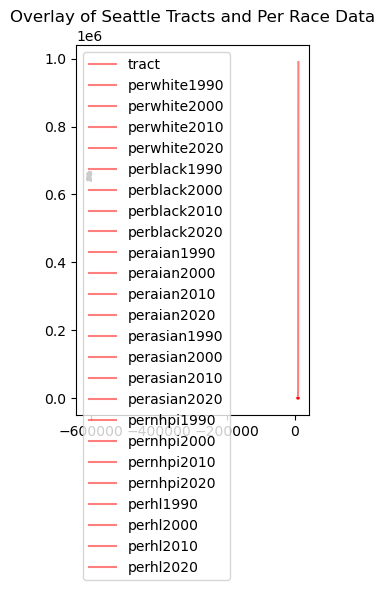

In [31]:
fig, ax = plt.subplots()

# Plot sea_tracts_gdf with no fill and black edges
sea_tracts_gdf.plot(ax=ax, facecolor='none', edgecolor='k', label='Seattle Tracts')

# Plot per_race_sea_df with red color and 50% transparency
per_race_sea_df.plot(ax=ax, color='red', label='Per Race Data', alpha=0.5)

ax.set_title('Overlay of Seattle Tracts and Per Race Data')
ax.legend()
plt.show()


In [26]:
# Convert the 'tract' column to string in both DataFrames
sea_tracts_gdf['tract'] = sea_tracts_gdf['tract'].astype(str)
per_race_sea_df['tract'] = per_race_sea_df['tract'].astype(str)

# Merge the DataFrames on the 'tract' column
merged_gdf = sea_tracts_gdf.merge(per_race_sea_df, on='tract')

# Plot the merged GeoDataFrame
fig, ax = plt.subplots()
merged_gdf.plot(column='your_data_column', ax=ax, legend=True)
plt.show()

/tmp/ipykernel_146/2424219404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_race_sea_df['tract'] = per_race_sea_df['tract'].astype(str)


ValueError: 'tract' is both an index level and a column label, which is ambiguous.

In [28]:
# Reset the index if 'tract' is an index
if 'tract' in sea_tracts_gdf.index.names:
    sea_tracts_gdf.reset_index(level='tract', inplace=True)
if 'tract' in per_race_sea_df.index.names:
    per_race_sea_df.reset_index(level='tract', inplace=True)

# Convert the 'tract' column to string in both DataFrames
sea_tracts_gdf['tract'] = sea_tracts_gdf['tract'].astype(str)
per_race_sea_df['tract'] = per_race_sea_df['tract'].astype(str)

# Merge the DataFrames on the 'tract' column
merged_gdf = sea_tracts_gdf.merge(per_race_sea_df, on='tract')

# Plot the merged GeoDataFrame
fig, ax = plt.subplots()
merged_gdf.plot(column='your_data_column', ax=ax, legend=True)
plt.show()

ValueError: cannot insert tract, already exists